DataFrame cargado exitosamente desde: resultados_experimentos.csv
Columnas disponibles: ['sitio', 'temperatura', 'humedad', 'luz', 'biomasa']

DataFrame a utilizar:
Filas: 20, Columnas: 5
Columnas: ['sitio', 'temperatura', 'humedad', 'luz', 'biomasa']

Primeras filas:
                    sitio  temperatura  humedad   luz  biomasa
0  Bosque Alto de Nocaima         23.8     82.2  1030    250.8
1      Humedal Facatativá         18.0     89.7   395    225.8
2       Río San Francisco         17.2     85.4   647    237.5
3       Ladera de La Vega         21.7     81.4   769    252.4
4   Zona Húmeda El Vergel         24.1     85.3  1333    302.7


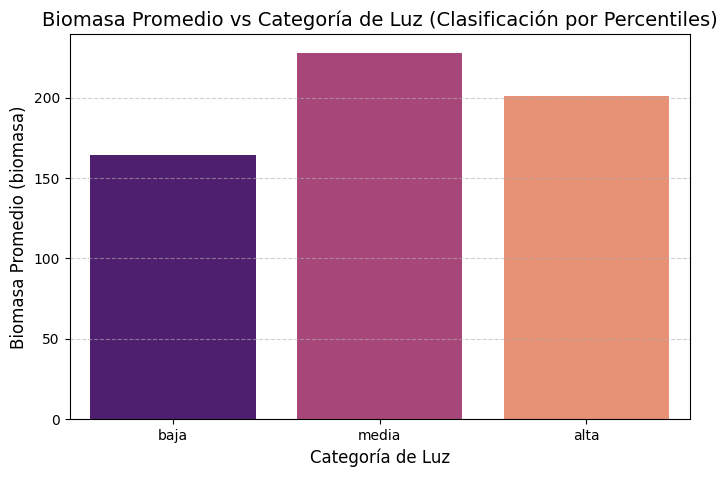


--- RESUMEN ---
✔ Columna 'indice_luz' agregada.
✔ Columna 'categoria_luz' agregada (Percentiles: P33=769.54, P66=1010.48).
✔ Gráfico de barras generado y mostrado.
✔ DataFrame final guardado en: resultado_reto2_santiago_final.csv

--- ESTADÍSTICAS ADICIONALES ---
Rango de luz: 395 - 1482
Rango de biomasa: 54.8 - 315.6

Distribución de categorías de luz:
categoria_luz
alta     7
baja     7
media    6
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ruta del archivo CSV real
archivo_input = 'resultados_experimentos.csv'

# Columnas reales del CSV
COL_LUZ = 'luz'
COL_BIOMASA = 'biomasa'

use_example_data = False
df = None

try:
    df_loaded = pd.read_csv(archivo_input)
    print(f"DataFrame cargado exitosamente desde: {archivo_input}")
    print(f"Columnas disponibles: {list(df_loaded.columns)}")

    # Verificar que las columnas reales existen
    if COL_LUZ not in df_loaded.columns or COL_BIOMASA not in df_loaded.columns:
        print(f"¡ADVERTENCIA! El archivo no contiene las columnas esperadas: '{COL_LUZ}' y/o '{COL_BIOMASA}'.")
        print("Usando las columnas disponibles del archivo real.")
        # Usar el archivo real pero con los nombres de columnas correctos
        if 'luz' in df_loaded.columns and 'biomasa' in df_loaded.columns:
            df = df_loaded
            print("✓ Usando columnas 'luz' y 'biomasa' del archivo real")
        else:
            use_example_data = True
    else:
        df = df_loaded

except FileNotFoundError:
    print(f"¡ADVERTENCIA! No se encontró el archivo en la ruta: {archivo_input}")
    use_example_data = True

if use_example_data:
    print("Creando un DataFrame de EJEMPLO para que el código pueda ejecutarse.")
    data = {
        'sitio': [f'Sitio_{i+1}' for i in range(10)],
        COL_LUZ: [100, 250, 50, 400, 300, 150, 450, 200, 350, 120],
        COL_BIOMASA: [2.5, 5.2, 1.1, 8.5, 6.1, 3.0, 9.5, 4.0, 7.3, 2.8]
    }
    df = pd.DataFrame(data)

# Mostrar información del DataFrame que se va a usar
print(f"\nDataFrame a utilizar:")
print(f"Filas: {len(df)}, Columnas: {len(df.columns)}")
print(f"Columnas: {list(df.columns)}")
print(f"\nPrimeras filas:")
print(df.head())

def indice_luz(df):
    """Calcula el índice de luz (Luz_Sitio / Luz_Máxima)."""
    luz_maxima = df[COL_LUZ].max()
    df['indice_luz'] = df[COL_LUZ] / luz_maxima
    return df

# Aplicar la función para calcular índice de luz
df = indice_luz(df.copy())

# Calcular percentiles para clasificación
p33 = df[COL_LUZ].quantile(0.33)
p66 = df[COL_LUZ].quantile(0.66)

def clasificar_luz(valor, p33, p66):
    """Clasifica el valor de luz en 'baja', 'media' o 'alta'."""
    if valor <= p33:
        return 'baja'
    elif valor <= p66:
        return 'media'
    else:
        return 'alta'

# Aplicar clasificación de luz
df['categoria_luz'] = df[COL_LUZ].apply(lambda x: clasificar_luz(x, p33, p66))

# Calcular biomasa promedio por categoría de luz
biomasa_promedio = df.groupby('categoria_luz')[COL_BIOMASA].mean().reset_index()

# Ordenar categorías para el gráfico
orden_categorias = ['baja', 'media', 'alta']
biomasa_promedio['categoria_luz'] = pd.Categorical(
    biomasa_promedio['categoria_luz'],
    categories=orden_categorias,
    ordered=True
)
biomasa_promedio = biomasa_promedio.sort_values('categoria_luz')

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    x='categoria_luz',
    y=COL_BIOMASA,
    data=biomasa_promedio,
    palette='magma',
    order=orden_categorias,
    hue='categoria_luz',
    legend=False
)
plt.title('Biomasa Promedio vs Categoría de Luz (Clasificación por Percentiles)', fontsize=14)
plt.xlabel('Categoría de Luz', fontsize=12)
plt.ylabel(f'Biomasa Promedio ({COL_BIOMASA})', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Guardar resultados
nombre_archivo_salida = 'resultado_reto2_santiago_final.csv'
df.to_csv(nombre_archivo_salida, index=False)

print("\n--- RESUMEN ---")
print(f"✔ Columna 'indice_luz' agregada.")
print(f"✔ Columna 'categoria_luz' agregada (Percentiles: P33={p33:.2f}, P66={p66:.2f}).")
print("✔ Gráfico de barras generado y mostrado.")
print(f"✔ DataFrame final guardado en: {nombre_archivo_salida}")

# Mostrar estadísticas adicionales
print(f"\n--- ESTADÍSTICAS ADICIONALES ---")
print(f"Rango de luz: {df[COL_LUZ].min()} - {df[COL_LUZ].max()}")
print(f"Rango de biomasa: {df[COL_BIOMASA].min():.1f} - {df[COL_BIOMASA].max():.1f}")
print(f"\nDistribución de categorías de luz:")
print(df['categoria_luz'].value_counts().sort_index())